#Test for some gslib function in the fortran code


Function tests:

 * subroutine setrot(ang1,ang2,ang3,anis1,anis2,ind,maxrot,rotmat)
 * function sqdist(x1,y1,z1,x2,y2,z2,ind,maxrot,rotmat)
 * subroutine cova3(x1,y1,z1,x2,y2,z2,ivarg,nst,c0,it,cc,aa, 
    irot,maxrot,rotmat,cmax,cova)


## Defining and plotting direction over a plane

In [1]:
%matplotlib inline


import pygslib as gslib      

#to plot in 2D and 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

#numpy for matrix
import numpy as np

#this is to add controls into the plots 
from IPython.html import widgets
from IPython.html.widgets import interact, fixed

#This is my pygslib version
gslib.version()

:0: FutureWarning: IPython widgets are experimental and may change in the future.


{'platform': 'Linux-3.19.0-30-generic-x86_64-with-debian-jessie-sid',
 'python version': {'build': 3,
  'maintenance': 0,
  'major': 0,
  'minor': 0,
  'month': 9,
  'year': 2015}}

In [2]:
#define a direction:
import numpy as np
import matplotlib.pyplot as plt

def hdir(r=1, ndir=18, refdir=0):
    theta = np.linspace(0, np.pi, ndir+1)[:-1]
    ax = plt.subplot(111, polar=True)
    
    # make clockwise like maps
    ax.set_theta_direction(-1)
    # make the plot to point north 
    ax.set_theta_zero_location("N")

    for t in theta: 
        pass
        ax.plot([0,t], [0,r], color='r', linewidth=1)
        ax.plot([0,t+np.pi], [0,r], color='r', linewidth=1)

    ax.grid(True)

    
    ax.invert_yaxis()
    ax.set_title("A line plot on a polar axis", va='bottom')
    
    
    ax.plot([0,refdir], [0,r], color='b', linewidth=3)
    ax.plot([0,refdir+np.pi], [0,r], color='b', linewidth=3)

    plt.show()
    
    
    return np.rad2deg(theta) #the last direction 


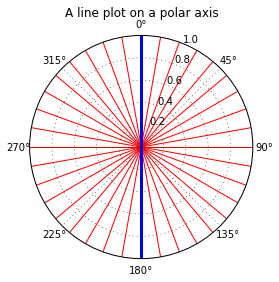

18 [   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.]


In [3]:
azm= hdir(r=1, ndir=18, refdir=0)
print len (azm), azm

#Direction of rotated planes

We use Spherical coordinates (r, θ, φ) as commonly used in physics: radial distance r, polar angle θ (theta), and azimuthal angle φ (phi). The symbol ρ (rho) is often used instead of r. (see https://en.wikipedia.org/wiki/Spherical_coordinate_system)

The spherical coordinates of a point in the ISO convention (radius r, inclination θ, azimuth φ) can be obtained from its Cartesian coordinates (x, y, z) by the formulae

$$
\begin{align}
& r = \sqrt{x^2 + y^2 + z^2} \\
& \theta = \operatorname{arccos}\left(\frac{z}{\sqrt{x^2 + y^2 + z^2}}\right) \\
& \varphi = \operatorname{arctan}\left(\frac{y}{x}\right)
\end{align}
$$

Conversely, the Cartesian coordinates may be retrieved from the spherical coordinates (radius r, inclination θ, azimuth φ), where r ∈ [0, ∞), θ ∈ [0, π], φ ∈ [0, 2π), by:
$$
\begin{align}
& x=r \, \sin\theta \, \cos\varphi  \\
& y=r \, \sin\theta \, \sin\varphi  \\
& z=r \, \cos\theta
\end{align}
$$

To rotate variogram planes we conver direction to vectors, we rotate with a given convention, then we get the new θ', φ' values to define rotated directions 





> for 2D use inclination (θ) = 0

In [4]:
#transfor cartesian to spheric
def cartesian2spheric(x, y, z):
    '''
    Transform cartesian coordinates into spheric coordinates 
    
    input
    -----
    x, y, z  cartesian coordinate, 1D arrays (float) with equal dimensions
    
    output 
    -----
    
    (r,theta,phi)  spherical coordinates, arrays (float)
    '''
    r=np.sqrt(x**2+y**2+z**2)
    theta = np.arccos (z/r)
    phi=np.arctan(y/x)
    
    return r, theta, phi

def spheric2cartesian(r,theta,phi):
    '''
    Transform  spheric into cartesian coordinates coordinates 
    
    input
    -----
    r, theta, phi  spheric coordinate, list/tuple of 1D array (float) with equal dimensions
    
    output 
    -----
    
    (x, y, z)  cartesian coordinates, arrays (float)
    '''
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)
    
    return x, y, z

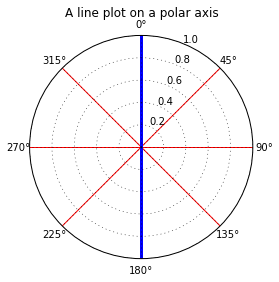

In [5]:
azm= hdir(r=1, ndir=4, refdir=0)  #this produces a plot + directions
phi=azm
theta = np.ones (azm.shape)*90
r = np.ones(azm.shape)

x,y,z = spheric2cartesian(r,np.deg2rad(theta),np.deg2rad(phi))


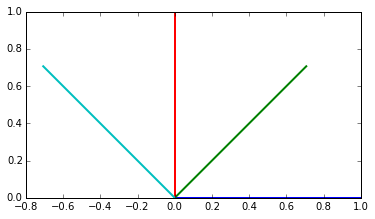

In [6]:
for i in range(len(x)):
    plt.plot ([0,x[i]], [0,y[i]], linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#Basic rotations
We are using the folowing rotation matrix

\begin{alignat}{1}
R_x(\theta) &= \begin{bmatrix}
1 & 0 & 0 \\
0 & \cos \theta &  -\sin \theta \\[3pt]
0 & \sin \theta  &  \cos \theta \\[3pt]
\end{bmatrix} \\[6pt]
R_y(\theta) &= \begin{bmatrix}
\cos \theta & 0 & \sin \theta \\[3pt]
0 & 1 & 0 \\[3pt]
-\sin \theta & 0 & \cos \theta \\
\end{bmatrix} \\[6pt]
R_z(\theta) &= \begin{bmatrix}
\cos \theta &  \sin \theta & 0 \\[3pt]
-\sin \theta & \cos \theta & 0\\[3pt]
0 & 0 & 1\\
\end{bmatrix}
\end{alignat}

here we are trying to emulat the GSLIB rotations


#defining the rotation matrix

In [7]:
#print gslib.fgslib.setrot.__doc__
rotmat = gslib.__kt3d.setrot(ang1=45,ang2=0,ang3=0,anis1=1,anis2=1,ind=1,maxrot=1)

In [8]:
rotmat

array([[[ 0.70710679,  0.70710678,  0.        ],
        [-0.70710678,  0.70710679,  0.        ],
        [ 0.        , -0.        ,  1.        ]]])

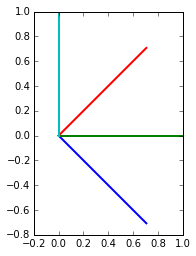

In [9]:
for i in range(len(x)):
    t=np.array([x[i], y[i], z[i]])
    tt=np.dot(rotmat[0],t)  # IMPORTANT the order is important, tt=np.dot(t, rotmat[0]) invert the rotation direction
    plt.plot ([0,tt[0]], [0,tt[1]], linewidth=2)
    
plt.gca().set_aspect('equal', adjustable='box')

In [11]:
#print gslib.fgslib.setrot.__doc__
rotmat = gslib.__kt3d.setrot(ang1=0,ang2=0,ang3=0,anis1=1,anis2=1,ind=1,maxrot=1)

In [12]:
print rotmat

[[[  1.21679645e-08   1.00000000e+00   0.00000000e+00]
  [ -1.00000000e+00   1.21679645e-08   0.00000000e+00]
  [  0.00000000e+00  -0.00000000e+00   1.00000000e+00]]]


In [13]:
print x,y,z


[  1.00000000e+00   7.07106781e-01   6.12323400e-17  -7.07106781e-01] [ 0.          0.70710678  1.          0.70710678] [  6.12323400e-17   6.12323400e-17   6.12323400e-17   6.12323400e-17]


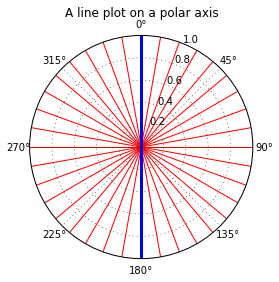

In [15]:
#now all directions
rotmat1 = gslib.__kt3d.setrot(ang1=10,ang2=0,ang3=0,anis1=1,anis2=1,ind=1,maxrot=3)
rotmat2 = gslib.__kt3d.setrot(ang1=0,ang2=90,ang3=0,anis1=1,anis2=1,ind=2,maxrot=3)
rotmat3 = gslib.__kt3d.setrot(ang1=145,ang2=45,ang3=90,anis1=1,anis2=1,ind=3,maxrot=3)
rotmat=rotmat1+rotmat2+rotmat3

azm= hdir(r=1, ndir=18, refdir=0)  #this produces a plot + directions
phi=azm
theta = np.ones (azm.shape)*90
r = np.ones(azm.shape)

x,y,z = spheric2cartesian(r,np.deg2rad(theta),np.deg2rad(phi))



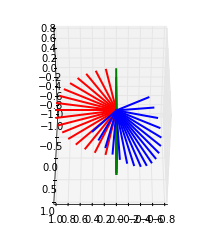

<function __main__.plot_dir_3d_3s>

In [16]:
%matplotlib inline

def plot_dir_3d_3s(rotmat, x1,y1,z1, x2,y2,z2, x3,y3,z3, fazim, felev):

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    for i in range(len(x1)):
        t=np.array([x1[i], y1[i], z1[i]])
        tt=np.dot(rotmat[0],t)  # IMPORTANT the order is important, tt=np.dot(t, rotmat[0]) invert the rotation direction
        ax.plot ([0,tt[0]], [0,tt[1]], [0,tt[2]], linewidth=2, color= 'r')
        
    for i in range(len(x2)):
        t=np.array([x2[i], y2[i], z2[i]])
        tt=np.dot(rotmat[1],t)  # IMPORTANT the order is important, tt=np.dot(t, rotmat[0]) invert the rotation direction
        ax.plot ([0,tt[0]], [0,tt[1]], [0,tt[2]], linewidth=2, color= 'g')
        
    for i in range(len(x3)):
        t=np.array([x3[i], y3[i], z3[i]])
        tt=np.dot(rotmat[2],t)  # IMPORTANT the order is important, tt=np.dot(t, rotmat[0]) invert the rotation direction
        ax.plot ([0,tt[0]], [0,tt[1]], [0,tt[2]], linewidth=2, color= 'b')

    plt.gca().set_aspect('equal', adjustable='box')    
    
    ax.view_init(elev=felev, azim=fazim)
    
    plt.show()    

interact (plot_dir_3d_3s, 
          rotmat=fixed(rotmat),
          x1=fixed(x),
          y1=fixed(y),
          z1=fixed(z),
          x2=fixed(x),
          y2=fixed(y),
          z2=fixed(z),
          x3=fixed(x),
          y3=fixed(y),
          z3=fixed(z),
          fazim=widgets.FloatSlider(min=0, max=360, step=5, value=90.0),
          felev=widgets.FloatSlider(min=-90, max=90, step=5, value=45.0))

Test funtion 
--------------
 * function sqdist(x1,y1,z1,x2,y2,z2,ind,maxrot,rotmat)


In [17]:
print gslib.__kt3d.sqdist.__doc__

sqdist = sqdist(x1,y1,z1,x2,y2,z2,ind,rotmat,[maxrot])

Wrapper for ``sqdist``.

Parameters
----------
x1 : input float
y1 : input float
z1 : input float
x2 : input float
y2 : input float
z2 : input float
ind : input int
rotmat : input rank-3 array('d') with bounds (maxrot,3,3)

Other Parameters
----------------
maxrot : input int, optional
    Default: shape(rotmat,0)

Returns
-------
sqdist : float



In [19]:
#now all directions
rotmat1 = gslib.__kt3d.setrot(ang1=10,ang2=0,ang3=0,anis1=1,anis2=1,ind=1,maxrot=3)
rotmat2 = gslib.__kt3d.setrot(ang1=0,ang2=90,ang3=0,anis1=1,anis2=1,ind=2,maxrot=3)
rotmat3 = gslib.__kt3d.setrot(ang1=145,ang2=45,ang3=90,anis1=1,anis2=1,ind=3,maxrot=3)
rotmat=rotmat1+rotmat2+rotmat3

gslib.__kt3d.sqdist(x1=0,y1=0,z1=0,x2=1,y2=1,z2=1,ind=2,rotmat=rotmat)

2.999999999999999

In [20]:
print rotmat[0,:,:], ' \n *******  \n' ,  rotmat1[0,:,:], ' \n ******* '
print rotmat[1,:,:], ' \n *******  \n' , rotmat2[1,:,:], ' \n ******* '
print rotmat[2,:,:], ' \n *******  \n' , rotmat3[2,:,:]

[[ 0.17364819  0.98480775  0.        ]
 [-0.98480775  0.17364819  0.        ]
 [ 0.          0.          1.        ]]  
 *******  
[[ 0.17364819  0.98480775  0.        ]
 [-0.98480775  0.17364819  0.        ]
 [ 0.         -0.          1.        ]]  
 ******* 
[[  1.48059359e-16   1.21679645e-08   1.00000000e+00]
 [ -1.00000000e+00   1.21679645e-08   0.00000000e+00]
 [ -1.21679645e-08  -1.00000000e+00   1.21679645e-08]]  
 *******  
[[  1.48059359e-16   1.21679645e-08   1.00000000e+00]
 [ -1.00000000e+00   1.21679645e-08   0.00000000e+00]
 [ -1.21679645e-08  -1.00000000e+00   1.21679645e-08]]  
 ******* 
[[  4.05579794e-01  -5.79227966e-01   7.07106777e-01]
 [ -4.05579780e-01   5.79227966e-01   7.07106785e-01]
 [ -8.19152045e-01  -5.73576435e-01   8.60405025e-09]]  
 *******  
[[  4.05579794e-01  -5.79227966e-01   7.07106777e-01]
 [ -4.05579780e-01   5.79227966e-01   7.07106785e-01]
 [ -8.19152045e-01  -5.73576435e-01   8.60405025e-09]]


Test function 
----------------
 * subroutine cova3(x1,y1,z1,x2,y2,z2,ivarg,nst,c0,it,cc,aa, 
    irot,maxrot,rotmat,cmax,cova)

In [21]:
print gslib.__kt3d.cova3.__doc__

cmax,cova = cova3(x1,y1,z1,x2,y2,z2,nst,c0,it,cc,aa,irot,rotmat,[ivarg,maxrot])

Wrapper for ``cova3``.

Parameters
----------
x1 : input float
y1 : input float
z1 : input float
x2 : input float
y2 : input float
z2 : input float
nst : input int
c0 : input rank-1 array('d') with bounds (ivarg)
it : input rank-1 array('i') with bounds (nst*ivarg)
cc : input rank-1 array('d') with bounds (nst*ivarg)
aa : input rank-1 array('d') with bounds (nst*ivarg)
irot : input int
rotmat : input rank-3 array('d') with bounds (maxrot,3,3)

Other Parameters
----------------
ivarg : input int, optional
    Default: len(c0)
maxrot : input int, optional
    Default: shape(rotmat,0)

Returns
-------
cmax : float
cova : float



In [22]:
h=1

parameters_cov3 = { 
        'x1'     :  0,            # X coordinates, point 1
        'y1'     :  0,            # Y coordinates, point 1
        'z1'     :  0,            # Z coordinates, point 1
        'x2'     :  0,            # X coordinates, point 2
        'y2'     :  0,            # Y coordinates, point 2
        'z2'     :  0,            # Z coordinates, point 2
        'nst'    :  2,          # number of nested structures, array('i') with bounds (ivarg), 
                                  # ivarg is variogram number
        'it'     :  [3,3],       # structure type,  array('i') with bounds (ivarg)        
        'c0'     :  [0.1],       # nugget,  array('f') with bounds (ivarg)        
        'cc'     :  [0.4, 0.5],  # variance, array('f') with bounds (nvarg*nst[0])
        'aa'     :  [8, 16],       # parameter a (or range), array('f') with bounds (nvarg*nst[0])
        'irot'   :  0,            # index of the rotation matrix for the first nested structure
                                  # the second nested structure will use irot+1, the third irot+2, and so on
        'rotmat' :  rotmat}       # rotation matrices (output of the funtion setrot)

cmax,cova = gslib.__kt3d.cova3(**parameters_cov3)

In [23]:
print cmax, cova

1.0 1.0


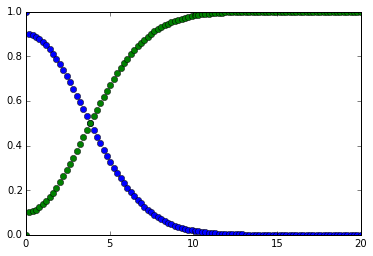

In [24]:
n=100
dis = np.linspace(0,20, n)
c= np.zeros (n)
v= np.zeros (n)

for i in range(n):
    parameters_cov3['x2']=dis[i]
    cmax,c[i]= gslib.__kt3d.cova3(**parameters_cov3)
    v[i]= cmax - c[i]

plt.plot (dis, c, 'o' )
plt.plot (dis, v, 'o' )